## پرسش دو

# بخش 1

Installing gdown

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Downloading dataset from google drive

In [ ]:
import gdown
# https://drive.google.com/file/d/1LcY5g2CoVygp86CKEJtvw4uqtwPCFdcL/view?usp=sharing
file_id = "1LcY5g2CoVygp86CKEJtvw4uqtwPCFdcL"
url = f"https://drive.google.com/uc?id={file_id}"

# File Direction
File_dir = "telecust1000.csv"

gdown.download(url, File_dir, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LcY5g2CoVygp86CKEJtvw4uqtwPCFdcL
To: /content/telecust1000.csv
100%|██████████| 37.0k/37.0k [00:00<00:00, 37.5MB/s]


'telecust1000.csv'

Reading the dataset

In [ ]:
import pandas as pd

dataset = pd.read_csv('telecust1000.csv')
dataset.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


#بخش 2

Plotting the heatmap

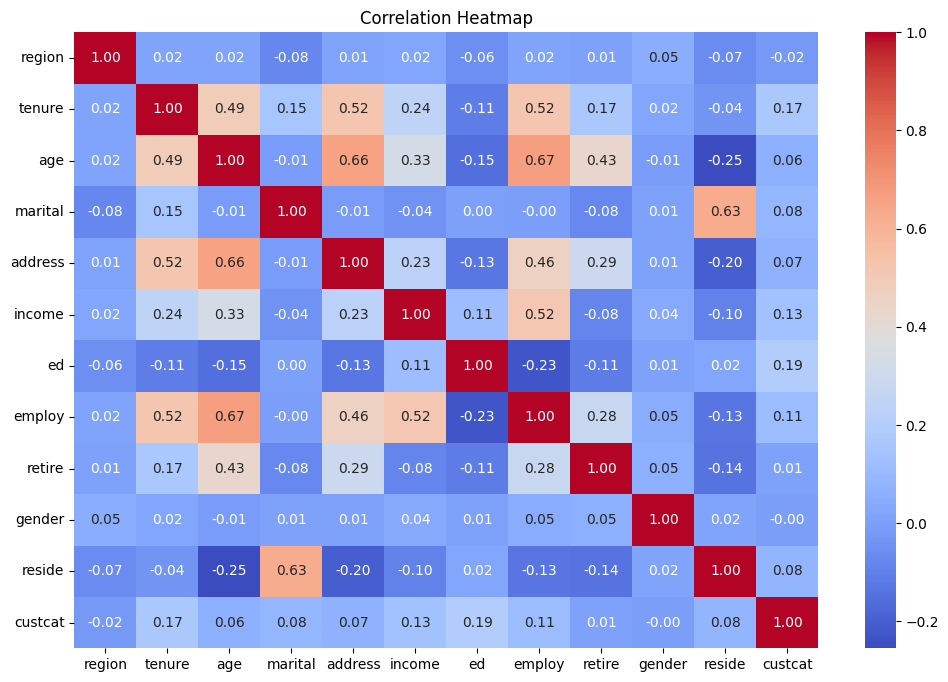

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Identify the two features with the highest correlation with the target variable 'custcat'

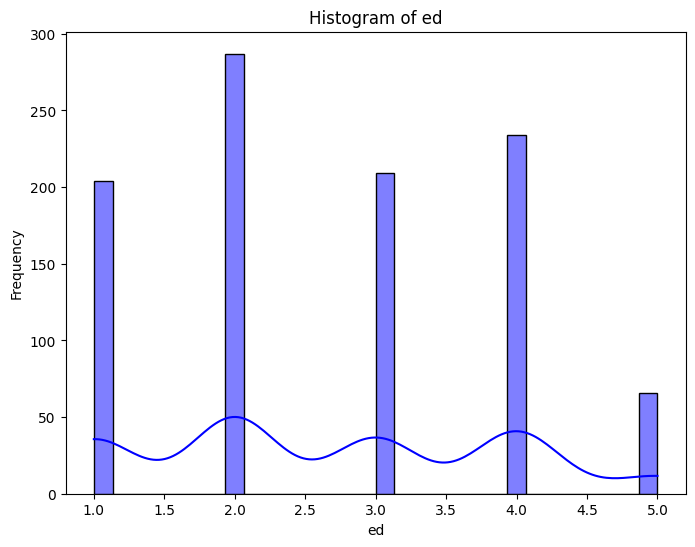

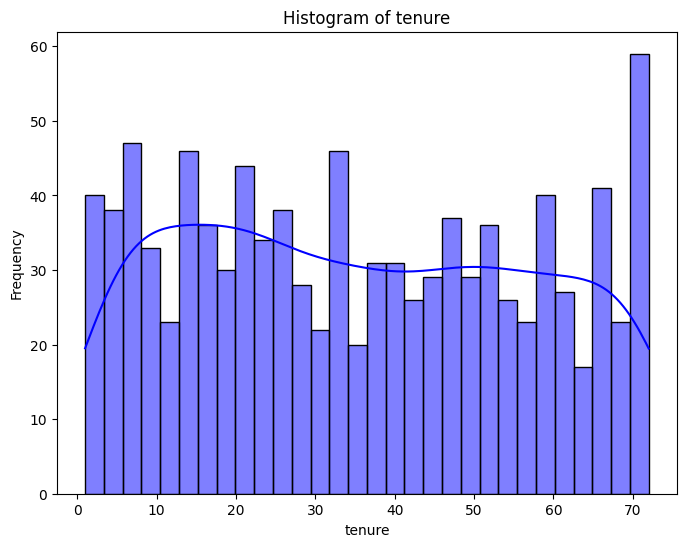

In [ ]:
# Identify the two features with the highest correlation with the target variable 'custcat'
target_corr = correlation_matrix['custcat'].drop('custcat')  # Exclude the target itself
top_features = target_corr.abs().sort_values(ascending=False).index[:2].tolist()

# Plot histograms for the two most correlated features
for feature in top_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[feature], bins=30, kde=True, color='blue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


# بخش 3

Normalizing the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Separate features (X) and target (y)
X = dataset.drop(columns=['custcat'])  # Features
y = dataset['custcat'] - 1  # Adjust target to range [0, num_classes - 1]

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)  # Normalize the features

# Convert normalized data back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first 5 rows of original and normalized data
print("Original Data (First 5 Rows):")
print(X.head())

print("\nNormalized Data (First 5 Rows):")
print(X_scaled_df.head())


Original Data (First 5 Rows):
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  

Normalized Data (First 5 Rows):
   region    tenure       age  marital   address    income    ed    employ  \
0     0.5  0.169014  0.440678      1.0  0.163636  0.033153  0.75  0.106383   
1     1.0  0.140845  0.254237      1.0  0.127273  0.076552  1.00  0.106383   
2     1.0  0.943662  0.576271      1.0  0.436364  0.064497  0.00  0.617021   
3     0.5  0.450704  0.254237      0.0  0.218182  0.014467  0.25  0.0000

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into train (60%), validation (20%), and test (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.4, random_state=13)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=13)

# بخش 4

قسمت اول:

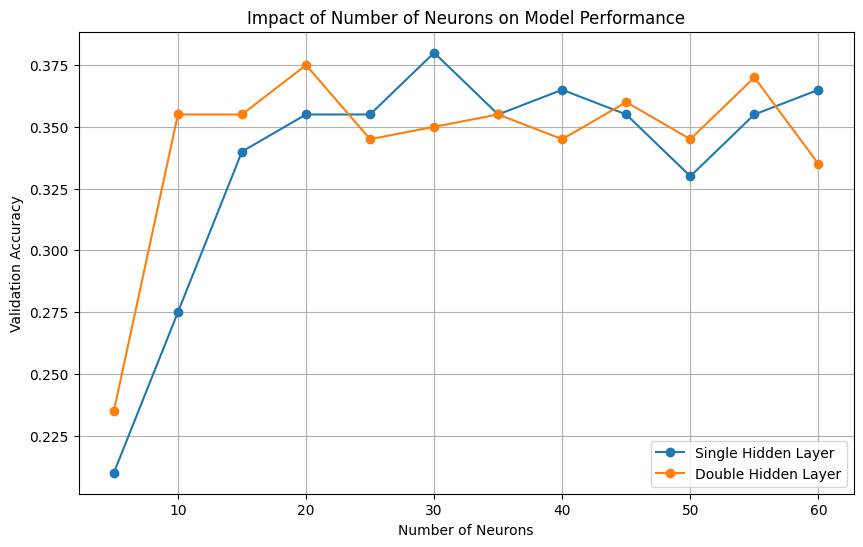

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


# Define the number of neurons to test in the hidden layers
neuron_counts = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]

# Create dictionaries to store results
results_single_layer = {}
results_double_layer = {}

# Loop through the neuron counts
for neurons in neuron_counts:
    # Model 1: Single hidden layer
    mlp_single = MLPClassifier(hidden_layer_sizes=(neurons,), solver='sgd', random_state=13, max_iter=5000)
    mlp_single.fit(X_train, y_train)
    y_val_pred_single = mlp_single.predict(X_val)
    accuracy_single = accuracy_score(y_val, y_val_pred_single)
    results_single_layer[neurons] = accuracy_single

    # Model 2: Double hidden layer
    mlp_double = MLPClassifier(hidden_layer_sizes=(neurons, neurons), solver='sgd', random_state=13, max_iter=5000)
    mlp_double.fit(X_train, y_train)
    y_val_pred_double = mlp_double.predict(X_val)
    accuracy_double = accuracy_score(y_val, y_val_pred_double)
    results_double_layer[neurons] = accuracy_double

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(results_single_layer.keys(), results_single_layer.values(), marker='o', label="Single Hidden Layer")
plt.plot(results_double_layer.keys(), results_double_layer.values(), marker='o', label="Double Hidden Layer")
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Accuracy")
plt.title("Impact of Number of Neurons on Model Performance")
plt.legend()
plt.grid(True)
plt.show()


قسمت دوم:

Results Without Normalization:
Single Layer: Validation Accuracy: 0.3550
Double Layer: Validation Accuracy: 0.3750

Results With Normalization:
Single Layer: Validation Accuracy: 0.3650
Double Layer: Validation Accuracy: 0.3950


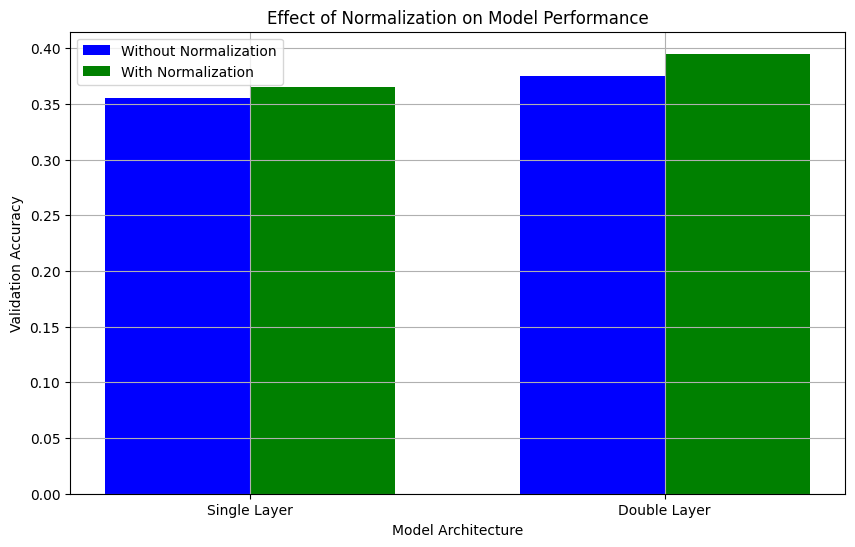

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the number of neurons
neuron_count = 20

# Store results
results_with_normalization = {}
results_without_normalization = {}

# Model 1: Single hidden layer
# Without normalization
mlp_single_no_norm = MLPClassifier(hidden_layer_sizes=(neuron_count,), solver='sgd', random_state=13, max_iter=5000)
mlp_single_no_norm.fit(X_train, y_train)
y_val_pred_single_no_norm = mlp_single_no_norm.predict(X_val)
accuracy_single_no_norm = accuracy_score(y_val, y_val_pred_single_no_norm)
results_without_normalization['Single Layer'] = accuracy_single_no_norm

# With normalization
mlp_single_with_norm = Pipeline([
    ('scaler', StandardScaler()),  # Add a standard scaler for normalization
    ('mlp', MLPClassifier(hidden_layer_sizes=(neuron_count,), solver='sgd', random_state=13, max_iter=5000))
])
mlp_single_with_norm.fit(X_train, y_train)
y_val_pred_single_with_norm = mlp_single_with_norm.predict(X_val)
accuracy_single_with_norm = accuracy_score(y_val, y_val_pred_single_with_norm)
results_with_normalization['Single Layer'] = accuracy_single_with_norm

# Model 2: Double hidden layer
# Without normalization
mlp_double_no_norm = MLPClassifier(hidden_layer_sizes=(neuron_count, neuron_count), solver='sgd', random_state=13, max_iter=5000)
mlp_double_no_norm.fit(X_train, y_train)
y_val_pred_double_no_norm = mlp_double_no_norm.predict(X_val)
accuracy_double_no_norm = accuracy_score(y_val, y_val_pred_double_no_norm)
results_without_normalization['Double Layer'] = accuracy_double_no_norm

# With normalization
mlp_double_with_norm = Pipeline([
    ('scaler', StandardScaler()),  # Add a standard scaler for normalization
    ('mlp', MLPClassifier(hidden_layer_sizes=(neuron_count, neuron_count), solver='sgd', random_state=13, max_iter=5000))
])
mlp_double_with_norm.fit(X_train, y_train)
y_val_pred_double_with_norm = mlp_double_with_norm.predict(X_val)
accuracy_double_with_norm = accuracy_score(y_val, y_val_pred_double_with_norm)
results_with_normalization['Double Layer'] = accuracy_double_with_norm

# Print results
print("Results Without Normalization:")
for model, acc in results_without_normalization.items():
    print(f"{model}: Validation Accuracy: {acc:.4f}")

print("\nResults With Normalization:")
for model, acc in results_with_normalization.items():
    print(f"{model}: Validation Accuracy: {acc:.4f}")

# Visualization of results
labels = ['Single Layer', 'Double Layer']
without_norm = [results_without_normalization[label] for label in labels]
with_norm = [results_with_normalization[label] for label in labels]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, without_norm, width, label='Without Normalization', color='blue')
plt.bar(x + width/2, with_norm, width, label='With Normalization', color='green')

plt.xlabel('Model Architecture')
plt.ylabel('Validation Accuracy')
plt.title('Effect of Normalization on Model Performance')
plt.xticks(x, labels)
plt.legend()
plt.grid(True)
plt.show()

قسمت سوم:

Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.0, Normalization: True
Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.3, Normalization: True
Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.5, Normalization: True
Training Model: 2 Hidden Layers, Neurons: 20, Dropout Rate: 0.0, Normalization: True
Training Model: 2 Hidden Layers, Neurons: 20, Dropout Rate: 0.3, Normalization: True
Training Model: 2 Hidden Layers, Neurons: 20, Dropout Rate: 0.5, Normalization: True
   hidden_layers  neurons  dropout_rate  train_loss  train_accuracy  val_loss  \
0              1       20           0.0    1.226632        0.438333  1.282586   
1              1       20           0.3    1.212095        0.425000  1.267326   
2              1       20           0.5    1.230706        0.443333  1.307775   
3              2       20           0.0    1.206919        0.450000  1.287675   
4              2       20           0.3    1.387701        0.253333  1.394416   
5   

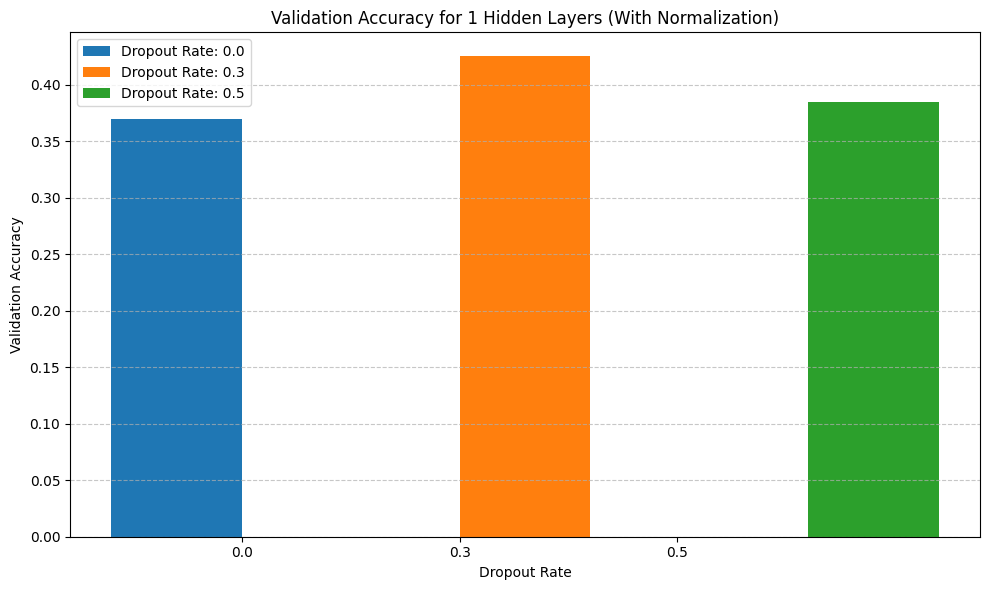

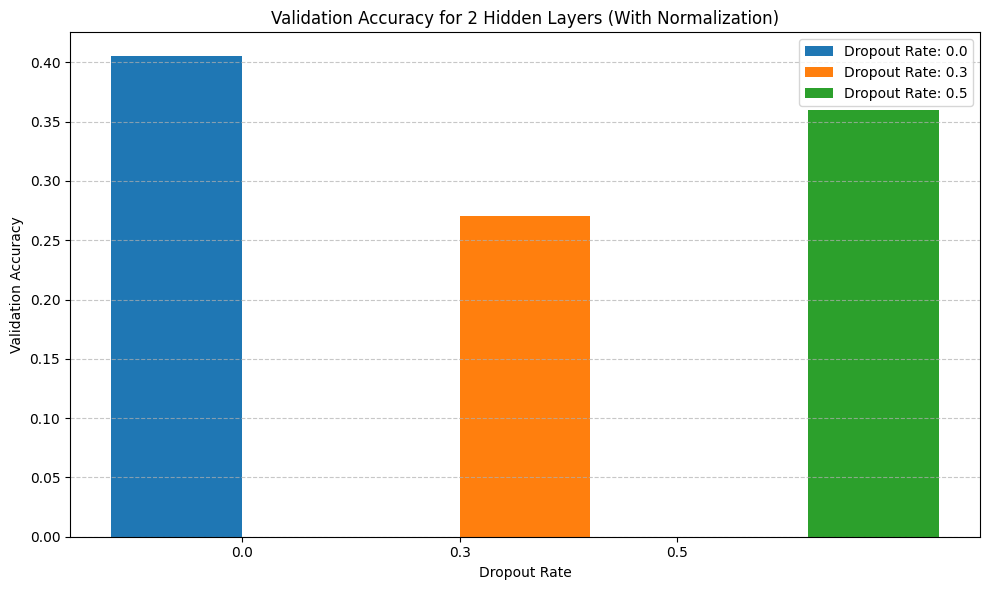

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a function to create models with normalization layers
def create_model_with_normalization(neurons, hidden_layers, dropout_rate):
    model = Sequential()

    # Add input layer
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation='relu'))
    model.add(BatchNormalization())  # Add normalization layer
    model.add(Dropout(dropout_rate))  # Add Dropout

    # Add additional hidden layers
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
        model.add(BatchNormalization())  # Add normalization layer
        model.add(Dropout(dropout_rate))  # Add Dropout

    # Add the output layer
    model.add(Dense(4, activation='softmax'))  # Output layer for 4 classes

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.01),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate models for single-layer and two-layer configurations
dropout_rates = [0.0, 0.3, 0.5]
results = []

# Configurations for single-layer and double-layer models (both with normalization)
configurations = [
    {"neurons": 20, "hidden_layers": 1},  # Single-layer
    {"neurons": 20, "hidden_layers": 2}  # Double-layer
]

for config in configurations:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    for dropout_rate in dropout_rates:
        print(f"Training Model: {hidden_layers} Hidden Layers, Neurons: {neurons}, Dropout Rate: {dropout_rate}, Normalization: True")

        # Create the model
        model = create_model_with_normalization(neurons=neurons, hidden_layers=hidden_layers, dropout_rate=dropout_rate)

        # Early stopping
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train the model
        history = model.fit(
            X_train, y_train,
            epochs=5000,
            batch_size=32,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping],
            verbose=0
        )

        # Evaluate the model
        train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
        val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

        # Store the results
        results.append({
            'hidden_layers': hidden_layers,
            'neurons': neurons,
            'dropout_rate': dropout_rate,
            'train_loss': train_loss,
            'train_accuracy': train_accuracy,
            'val_loss': val_loss,
            'val_accuracy': val_accuracy
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualization: Bar Charts with smaller bars and different colors
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # Colors for each dropout rate
dropout_rates = results_df['dropout_rate'].unique()
dropout_rates.sort()

for hidden_layers in [1, 2]:  # Loop through single-layer and double-layer models
    subset = results_df[results_df['hidden_layers'] == hidden_layers]

    # Prepare data for plotting
    val_accuracies = [subset[subset['dropout_rate'] == rate]['val_accuracy'].mean() for rate in dropout_rates]

    # Plot bar chart with shifted positions for each dropout rate
    x_positions = np.arange(len(dropout_rates))  # Base x positions
    bar_width = 0.6  # Smaller bars

    plt.figure(figsize=(10, 6))
    for i, (rate, color) in enumerate(zip(dropout_rates, colors)):
        plt.bar(x_positions[i] + (i * bar_width) - (bar_width / 2), val_accuracies[i],
                color=color, width=bar_width, label=f"Dropout Rate: {rate}")

    # Set chart properties
    normalization_label = f"{hidden_layers} Hidden Layers (With Normalization)"
    plt.title(f"Validation Accuracy for {normalization_label}")
    plt.xlabel("Dropout Rate")
    plt.ylabel("Validation Accuracy")
    plt.xticks(x_positions, [f"{rate:.1f}" for rate in dropout_rates])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


قسمت چهارم:

Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.0, L2: 0.0001
Training Model: 2 Hidden Layers, Neurons: 20, Dropout Rate: 0.3, L2: 0.0001
   hidden_layers  neurons  dropout_rate  l2_reg  train_loss  train_accuracy  \
0              1       20           0.0  0.0001    1.180164        0.451667   
1              2       20           0.3  0.0001    1.203066        0.440000   

   val_loss  val_accuracy  
0  1.274182         0.380  
1  1.295880         0.375  


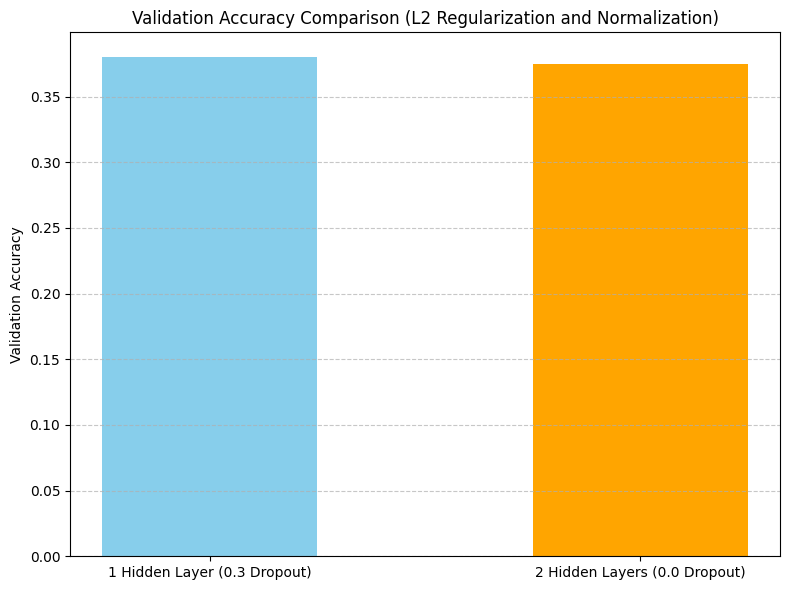

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Define a function to create models with normalization and L2 Regularization
def create_model_with_regularization(neurons, hidden_layers, dropout_rate, l2_reg):
    model = Sequential()

    # Add input layer
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
    model.add(BatchNormalization())  # Add normalization layer
    model.add(Dropout(dropout_rate))  # Add Dropout

    # Add additional hidden layers with normalization
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=l2(l2_reg)))
        model.add(BatchNormalization())  # Add normalization layer
        model.add(Dropout(dropout_rate))  # Add Dropout

    # Add the output layer with normalization
    model.add(Dense(4, activation='softmax', kernel_regularizer=l2(l2_reg)))  # Output layer for 4 classes

    # Compile the model
    model.compile(optimizer=SGD(),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Configurations
configurations = [
    {"neurons": 20, "hidden_layers": 1, "dropout_rate": 0.0},
    {"neurons": 20, "hidden_layers": 2, "dropout_rate": 0.3}
]

# L2 Regularization and Learning Rate
l2_reg = 0.0001

results = []

for config in configurations:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    dropout_rate = config['dropout_rate']

    print(f"Training Model: {hidden_layers} Hidden Layers, Neurons: {neurons}, Dropout Rate: {dropout_rate}, L2: {l2_reg}")

    # Create the model
    model = create_model_with_regularization(neurons=neurons, hidden_layers=hidden_layers,
                                             dropout_rate=dropout_rate, l2_reg=l2_reg)

    # Early stopping to avoid overfitting
    early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=5000,
        batch_size=32,
        validation_data=(X_val, y_val),
        callbacks=[early_stopping],
        verbose=0
    )

    # Evaluate the model
    train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)

    # Store the results
    results.append({
        'hidden_layers': hidden_layers,
        'neurons': neurons,
        'dropout_rate': dropout_rate,
        'l2_reg': l2_reg,
        'train_loss': train_loss,
        'train_accuracy': train_accuracy,
        'val_loss': val_loss,
        'val_accuracy': val_accuracy
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)

# Visualization: Bar Chart for Validation Accuracy
plt.figure(figsize=(8, 6))
labels = ['1 Hidden Layer (0.3 Dropout)', '2 Hidden Layers (0.0 Dropout)']
val_accuracies = results_df['val_accuracy']

plt.bar(labels, val_accuracies, color=['skyblue', 'orange'], width=0.5)
plt.title('Validation Accuracy Comparison (L2 Regularization and Normalization)')
plt.ylabel('Validation Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


قسمت پنجم:

Installing ADOPT:

In [ ]:
#Installing adopt
!pip install git+https://github.com/iShohei220/adopt

  Cloning https://github.com/iShohei220/adopt to /tmp/pip-req-build-mkhmurb5
  Running command git clone --filter=blob:none --quiet https://github.com/iShohei220/adopt /tmp/pip-req-build-mkhmurb5
  Resolved https://github.com/iShohei220/adopt to commit 6468572b4b3688a2f056b796b071da540568520e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-adopt: filename=torch_adopt-0.1.0-py3-none-any.whl size=11635 sha256=4f1b54dc398c173558fa65697b165d38a6278c60c7e5619d60fc98c5c9f868f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-34b_877b/wheels/7e/67/64/50eea3cc1f0c67fc30031dc46917e95eb96a7527af08c3db77
Successfully built torch-adopt


Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.3, Optimizer: RMSprop
Epoch 0/5000, Loss: 1.407915472984314, Val Accuracy: 0.25
Epoch 500/5000, Loss: 1.0401676893234253, Val Accuracy: 0.3700000047683716
Epoch 1000/5000, Loss: 0.9955048561096191, Val Accuracy: 0.33000001311302185
Epoch 1500/5000, Loss: 0.9791441559791565, Val Accuracy: 0.3050000071525574
Epoch 2000/5000, Loss: 0.9854720234870911, Val Accuracy: 0.32499998807907104
Epoch 2500/5000, Loss: 0.9585610032081604, Val Accuracy: 0.33500000834465027
Epoch 3000/5000, Loss: 0.9344198703765869, Val Accuracy: 0.3149999976158142
Epoch 3500/5000, Loss: 0.982923686504364, Val Accuracy: 0.3100000023841858
Epoch 4000/5000, Loss: 0.9356761574745178, Val Accuracy: 0.3100000023841858
Epoch 4500/5000, Loss: 0.9651194214820862, Val Accuracy: 0.33000001311302185
Training Model: 1 Hidden Layers, Neurons: 20, Dropout Rate: 0.3, Optimizer: Adam
Epoch 0/5000, Loss: 1.4842782020568848, Val Accuracy: 0.2549999952316284
Epoch 500/5000, Lo

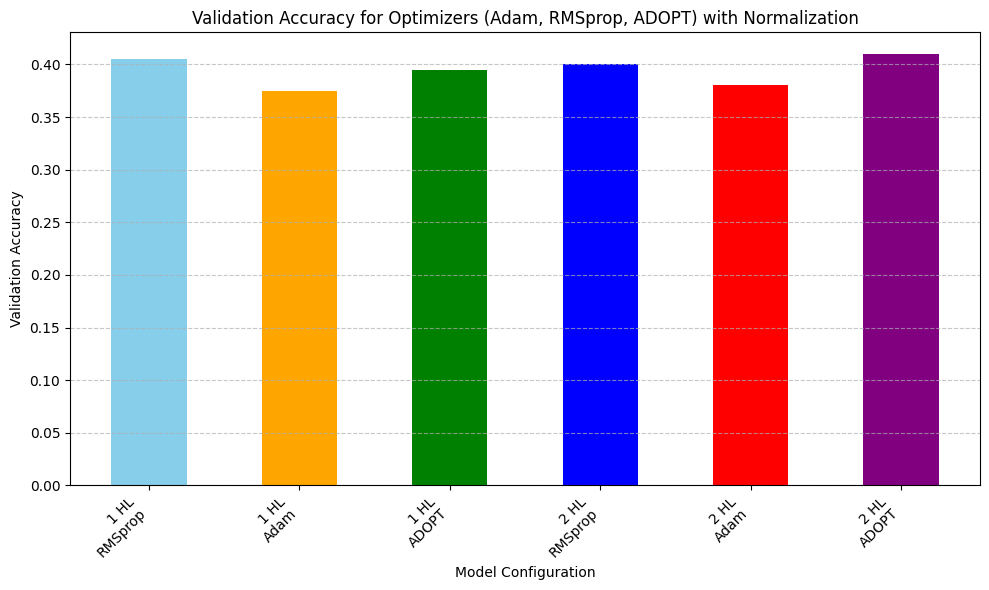

In [ ]:
import torch
import torch.nn as nn
from torch.optim import RMSprop, Adam
from adopt.adopt import ADOPT
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)

# Define the PyTorch models with Batch Normalization
class MLPModel(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, dropout_rate):
        super(MLPModel, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        self.layers.append(nn.Linear(input_size, neurons))
        self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_rate))

        # Hidden layers
        for _ in range(hidden_layers - 1):
            self.layers.append(nn.Linear(neurons, neurons))
            self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))

        # Output layer
        self.layers.append(nn.Linear(neurons, 4))  # 4 classes in the output

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Training function
def train_model(model, optimizer, criterion, X_train, y_train, X_val, y_val, epochs):
    train_losses = []
    val_accuracies = []

    for epoch in range(epochs):
        # Training
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

        # Validation
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            _, val_preds = torch.max(val_outputs, 1)
            val_accuracy = (val_preds == y_val).float().mean().item()
            val_accuracies.append(val_accuracy)

        if epoch % 500 == 0:
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}, Val Accuracy: {val_accuracy}")

    return train_losses, val_accuracies

# Configurations
configurations = [
    {"neurons": 20, "hidden_layers": 1, "dropout_rate": 0.3},
    {"neurons": 20, "hidden_layers": 2, "dropout_rate": 0.0}
]

# Optimizers
optimizers = {
    "RMSprop": lambda params: RMSprop(params),
    "Adam": lambda params: Adam(params),
    "ADOPT": lambda params: ADOPT(params)
}

results = []

# Train and evaluate models
for config in configurations:
    neurons = config['neurons']
    hidden_layers = config['hidden_layers']
    dropout_rate = config['dropout_rate']

    for optimizer_name, optimizer_fn in optimizers.items():
        print(f"Training Model: {hidden_layers} Hidden Layers, Neurons: {neurons}, Dropout Rate: {dropout_rate}, Optimizer: {optimizer_name}")

        # Create model
        model = MLPModel(input_size=X_train.shape[1], hidden_layers=hidden_layers, neurons=neurons, dropout_rate=dropout_rate)

        # Define optimizer
        optimizer = optimizer_fn(model.parameters())

        # Loss function
        criterion = nn.CrossEntropyLoss()

        # Train the model
        train_losses, val_accuracies = train_model(
            model, optimizer, criterion,
            X_train_tensor, y_train_tensor,
            X_val_tensor, y_val_tensor,
            epochs=5000
        )

        # Save results
        best_val_accuracy = max(val_accuracies)
        results.append({
            'hidden_layers': hidden_layers,
            'neurons': neurons,
            'dropout_rate': dropout_rate,
            'optimizer': optimizer_name,
            'best_val_accuracy': best_val_accuracy
        })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

# Visualization
plt.figure(figsize=(10, 6))
labels = []
val_accuracies = []

for idx, result in results_df.iterrows():
    labels.append(f"{result['hidden_layers']} HL\n{result['optimizer']}")
    val_accuracies.append(result['best_val_accuracy'])

plt.bar(labels, val_accuracies, color=['skyblue', 'orange', 'green', 'blue', 'red', 'purple'], width=0.5)
plt.title("Validation Accuracy for Optimizers (Adam, RMSprop, ADOPT) with Normalization")
plt.ylabel("Validation Accuracy")
plt.xlabel("Model Configuration")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# بخش 5

In [ ]:
import torch
import torch.nn as nn
from torch.optim import RMSprop
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from adopt.adopt import ADOPT

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the PyTorch models with Batch Normalization
class MLPModelWithNormalization(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, dropout_rate):
        super(MLPModelWithNormalization, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        self.layers.append(nn.Linear(input_size, neurons))
        self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_rate))

        # Hidden layers
        for _ in range(hidden_layers - 1):
            self.layers.append(nn.Linear(neurons, neurons))
            self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))

        # Output layer
        self.layers.append(nn.Linear(neurons, 4))  # 4 classes in the output

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Function to train and evaluate a model
def train_and_evaluate(model, optimizer, criterion, X_train, y_train, X_val, y_val, epochs):
    # Train the model
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate on validation data
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = (val_preds == y_val).float().mean().item()

    return model, val_accuracy

# Evaluate models with different optimizers
# RMSprop for 2 hidden layer model
print("\nEvaluating 2 Hidden Layer Model with ADOPT...")
model_2hl = MLPModelWithNormalization(input_size=X_train.shape[1], hidden_layers=2, neurons=20, dropout_rate=0.0)
optimizer_2hl = ADOPT(model_2hl.parameters())
criterion = nn.CrossEntropyLoss()

# Train the 2 hidden layer model
model_2hl, _ = train_and_evaluate(
    model_2hl, optimizer_2hl, criterion,
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    epochs=5000
)

# Evaluate on the test data
model_2hl.eval()
with torch.no_grad():
    test_outputs_2hl = model_2hl(X_test_tensor)
    _, test_preds_2hl = torch.max(test_outputs_2hl, 1)
    test_accuracy_2hl = (test_preds_2hl == y_test_tensor).float().mean().item()
print(f"Test Accuracy for 2 Hidden Layer Model with ADOPT: {test_accuracy_2hl}")

#  for 1 hidden layer model
print("\nEvaluating 1 Hidden Layer Model with RMSprop...")
model_1hl = MLPModelWithNormalization(input_size=X_train.shape[1], hidden_layers=1, neurons=20, dropout_rate=0.3)
optimizer_1hl = RMSprop(model_1hl.parameters())
# Train the 1 hidden layer model
model_1hl, _ = train_and_evaluate(
    model_1hl, optimizer_1hl, criterion,
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    epochs=5000
)

# Evaluate on the test data
model_1hl.eval()
with torch.no_grad():
    test_outputs_1hl = model_1hl(X_test_tensor)
    _, test_preds_1hl = torch.max(test_outputs_1hl, 1)
    test_accuracy_1hl = (test_preds_1hl == y_test_tensor).float().mean().item()
print(f"Test Accuracy for 1 Hidden Layer Model with RMSprop: {test_accuracy_1hl}")

# Compare predictions with real values for 10 random test samples
random_indices = np.random.choice(len(X_test), 10, replace=False)
X_test_random = X_test_tensor[random_indices]
y_test_random = y_test_tensor[random_indices]

print("\nComparing Predictions with Real Values for 10 Random Samples:")
for idx in range(10):
    with torch.no_grad():
        output_2hl = model_2hl(X_test_random[idx].unsqueeze(0))
        output_1hl = model_1hl(X_test_random[idx].unsqueeze(0))
        pred_2hl = torch.argmax(output_2hl, dim=1).item()
        pred_1hl = torch.argmax(output_1hl, dim=1).item()
    real_value = y_test_random[idx].item()
    print(f"Sample {idx + 1}: Real Value = {real_value}, 2HL (RMSprop) Prediction = {pred_2hl}, 1HL (RMSprop) Prediction = {pred_1hl}")



Evaluating 2 Hidden Layer Model with ADOPT...
Test Accuracy for 2 Hidden Layer Model with ADOPT: 0.3700000047683716

Evaluating 1 Hidden Layer Model with RMSprop...
Test Accuracy for 1 Hidden Layer Model with RMSprop: 0.4000000059604645

Comparing Predictions with Real Values for 10 Random Samples:
Sample 1: Real Value = 3, 2HL (RMSprop) Prediction = 1, 1HL (RMSprop) Prediction = 3
Sample 2: Real Value = 1, 2HL (RMSprop) Prediction = 1, 1HL (RMSprop) Prediction = 3
Sample 3: Real Value = 2, 2HL (RMSprop) Prediction = 0, 1HL (RMSprop) Prediction = 2
Sample 4: Real Value = 0, 2HL (RMSprop) Prediction = 3, 1HL (RMSprop) Prediction = 3
Sample 5: Real Value = 0, 2HL (RMSprop) Prediction = 0, 1HL (RMSprop) Prediction = 0
Sample 6: Real Value = 3, 2HL (RMSprop) Prediction = 1, 1HL (RMSprop) Prediction = 0
Sample 7: Real Value = 2, 2HL (RMSprop) Prediction = 1, 1HL (RMSprop) Prediction = 2
Sample 8: Real Value = 1, 2HL (RMSprop) Prediction = 1, 1HL (RMSprop) Prediction = 0
Sample 9: Real Valu

# بخش 6


Training 1 Hidden Layer Model with RMSprop...

Training 2 Hidden Layer Model with ADOPT...

Test Accuracy of Combined Model (Soft Voting): 0.36000001430511475

Confusion Matrix:
[[23  4 14 11]
 [ 6  8 12 14]
 [13 12 21 12]
 [ 9 12  9 20]]

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.45      0.44      0.45        52
     Class 1       0.22      0.20      0.21        40
     Class 2       0.38      0.36      0.37        58
     Class 3       0.35      0.40      0.37        50

    accuracy                           0.36       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.36      0.36       200



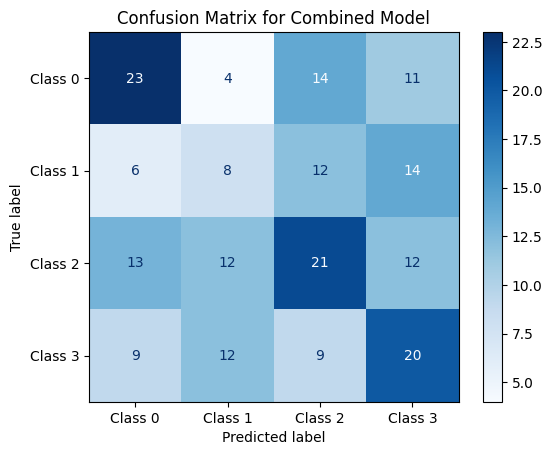

In [ ]:
import torch
import torch.nn as nn
from torch.optim import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from adopt.adopt import ADOPT
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

# Define the PyTorch model with Batch Normalization
class MLPModelWithNormalization(nn.Module):
    def __init__(self, input_size, hidden_layers, neurons, dropout_rate):
        super(MLPModelWithNormalization, self).__init__()
        self.layers = nn.ModuleList()

        # Input layer
        self.layers.append(nn.Linear(input_size, neurons))
        self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
        self.layers.append(nn.ReLU())
        self.layers.append(nn.Dropout(dropout_rate))

        # Hidden layers
        for _ in range(hidden_layers - 1):
            self.layers.append(nn.Linear(neurons, neurons))
            self.layers.append(nn.BatchNorm1d(neurons))  # Add Batch Normalization
            self.layers.append(nn.ReLU())
            self.layers.append(nn.Dropout(dropout_rate))

        # Output layer
        self.layers.append(nn.Linear(neurons, 4))  # 4 classes in the output

    def forward(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

# Function to train and evaluate a model
def train_model(model, optimizer, criterion, X_train, y_train, X_val, y_val, epochs):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluate on validation data
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val)
        _, val_preds = torch.max(val_outputs, 1)
        val_accuracy = (val_preds == y_val).float().mean().item()

    return model, val_accuracy

# Train 1 Hidden Layer Model
print("\nTraining 1 Hidden Layer Model with RMSprop...")
model_1hl = MLPModelWithNormalization(input_size=X_train.shape[1], hidden_layers=1, neurons=20, dropout_rate=0.3)
optimizer_1hl = RMSprop(model_1hl.parameters())
criterion = nn.CrossEntropyLoss()
model_1hl, _ = train_model(
    model_1hl, optimizer_1hl, criterion,
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    epochs=5000
)

# Train 2 Hidden Layer Model
print("\nTraining 2 Hidden Layer Model with ADOPT...")
model_2hl = MLPModelWithNormalization(input_size=X_train.shape[1], hidden_layers=2, neurons=20, dropout_rate=0.0)
optimizer_2hl = ADOPT(model_2hl.parameters())
model_2hl, _ = train_model(
    model_2hl, optimizer_2hl, criterion,
    X_train_tensor, y_train_tensor,
    X_val_tensor, y_val_tensor,
    epochs=5000
)

# Soft Voting Ensemble Function
def soft_voting_ensemble(model_1, model_2, X_test):
    model_1.eval()
    model_2.eval()

    with torch.no_grad():
        # Get probabilities from both models
        probs_1 = torch.softmax(model_1(X_test), dim=1)
        probs_2 = torch.softmax(model_2(X_test), dim=1)

        # Average the probabilities
        avg_probs = (probs_1 + probs_2) / 2

        # Get the final predictions
        _, final_preds = torch.max(avg_probs, 1)

    return final_preds

# Apply soft voting ensemble on the test data
final_preds = soft_voting_ensemble(model_1hl, model_2hl, X_test_tensor)

# Evaluate the combined model
test_accuracy_combined = (final_preds == y_test_tensor).float().mean().item()
print(f"\nTest Accuracy of Combined Model (Soft Voting): {test_accuracy_combined}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), final_preds.numpy())
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test_tensor.numpy(), final_preds.numpy(), target_names=["Class 0", "Class 1", "Class 2", "Class 3"])
print("\nClassification Report:")
print(class_report)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Class 0", "Class 1", "Class 2", "Class 3"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for Combined Model")
plt.show()
